In [1]:
import numpy as np

def load_data():
    """
    Generate x and y values
    """
    raw = np.stack(
        np.meshgrid(range(0, 100), ["+", "-"], range(0, 100)), axis=-1
    ).reshape(-1, 3)

    # Generate x from raw data
    x = np.full((len(raw), 5), 12)
    y = np.full((len(raw), 4), 12)

    for sample in range(len(raw)):
        # Encoding raw input onto x
        k = 0
        for i in raw[sample]:
            for j in i:
                if j == "+":
                    x[sample, k] = 10
                elif j == "-":
                    x[sample, k] = 11
                else:
                    x[sample, k] = j
                k = k + 1

        # Calculate raw input and encoding output onto y
        equation = raw[sample][0] + raw[sample][1] + raw[sample][2]
        result = eval(equation)
        k = 0
        if result >= 0:
            result = "+" + str(result)
        for i in str(result):
            if i == "+":
                y[sample, k] = 10
            elif i == "-":
                y[sample, k] = 11
            else:
                y[sample, k] = i
            k = k + 1
    return x, y


In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


x, y = load_data()
reversed_x, reversed_y = np.flip(x, axis=1), np.flip(y, axis=1)

one_hot_x = to_categorical(x, num_classes=13)
one_hot_y = to_categorical(y, num_classes=13)
one_hot_reversed_x = to_categorical(reversed_x, num_classes=13)
one_hot_reversed_y = to_categorical(reversed_y, num_classes=13)

x_train, x_test, y_train, y_test = train_test_split(
    one_hot_x, one_hot_y, train_size=0.7
)
reversed_x_train, reversed_x_test, reversed_y_train, reversed_y_test = train_test_split(
    one_hot_reversed_x, one_hot_reversed_y, train_size=0.7
)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def build_model():
    model = Sequential()
    model.add(LSTM(16, input_shape=(5, 13), return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=False))
    model.add(RepeatVector(4))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dense(13, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [4]:
normal_model = build_model()

normal_result = normal_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=500,
    batch_size=32
)

normal_eval_result = normal_model.evaluate(x_test,y_test)
print("Loss: %.5f \nAccuracy: %.5f" % (normal_eval_result[0], normal_eval_result [1]))

Train on 14000 samples, validate on 6000 samples
Epoch 1/500
14000/14000 [==============================] - 14s 971us/sample - loss: 2.0238 - accuracy: 0.3810 - val_loss: 1.5118 - val_accuracy: 0.5035
Epoch 2/500
14000/14000 [==============================] - 5s 341us/sample - loss: 1.4090 - accuracy: 0.5029 - val_loss: 1.3629 - val_accuracy: 0.5076
Epoch 3/500
14000/14000 [==============================] - 5s 348us/sample - loss: 1.3184 - accuracy: 0.5056 - val_loss: 1.2686 - val_accuracy: 0.5154
Epoch 4/500
14000/14000 [==============================] - 5s 336us/sample - loss: 1.2494 - accuracy: 0.5279 - val_loss: 1.2278 - val_accuracy: 0.5387
Epoch 5/500
14000/14000 [==============================] - 5s 352us/sample - loss: 1.2066 - accuracy: 0.5443 - val_loss: 1.1887 - val_accuracy: 0.5615
Epoch 6/500
14000/14000 [==============================] - 5s 344us/sample - loss: 1.1721 - accuracy: 0.5654 - val_loss: 1.1494 - val_accuracy: 0.5732
Epoch 7/500
14000/14000 [===================

14000/14000 [==============================] - 5s 342us/sample - loss: 0.6606 - accuracy: 0.7584 - val_loss: 0.6803 - val_accuracy: 0.7408
Epoch 55/500
14000/14000 [==============================] - 5s 341us/sample - loss: 0.6589 - accuracy: 0.7594 - val_loss: 0.6547 - val_accuracy: 0.7596
Epoch 56/500
14000/14000 [==============================] - 5s 340us/sample - loss: 0.6562 - accuracy: 0.7607 - val_loss: 0.6623 - val_accuracy: 0.7530
Epoch 57/500
14000/14000 [==============================] - 5s 341us/sample - loss: 0.6541 - accuracy: 0.7596 - val_loss: 0.6534 - val_accuracy: 0.7583
Epoch 58/500
14000/14000 [==============================] - 5s 345us/sample - loss: 0.6483 - accuracy: 0.7614 - val_loss: 0.6473 - val_accuracy: 0.7608
Epoch 59/500
14000/14000 [==============================] - 5s 346us/sample - loss: 0.6479 - accuracy: 0.7616 - val_loss: 0.6489 - val_accuracy: 0.7637
Epoch 60/500
14000/14000 [==============================] - 5s 342us/sample - loss: 0.6455 - accuracy

Epoch 108/500
14000/14000 [==============================] - 5s 331us/sample - loss: 0.5629 - accuracy: 0.7857 - val_loss: 0.5494 - val_accuracy: 0.7962
Epoch 109/500
14000/14000 [==============================] - 5s 330us/sample - loss: 0.5547 - accuracy: 0.7901 - val_loss: 0.5643 - val_accuracy: 0.7813
Epoch 110/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.5608 - accuracy: 0.7864 - val_loss: 0.5999 - val_accuracy: 0.7726
Epoch 111/500
14000/14000 [==============================] - 5s 330us/sample - loss: 0.5540 - accuracy: 0.7898 - val_loss: 0.5515 - val_accuracy: 0.7942
Epoch 112/500
14000/14000 [==============================] - 5s 329us/sample - loss: 0.5550 - accuracy: 0.7879 - val_loss: 0.5683 - val_accuracy: 0.7778
Epoch 113/500
14000/14000 [==============================] - 5s 330us/sample - loss: 0.5515 - accuracy: 0.7901 - val_loss: 0.5624 - val_accuracy: 0.7826
Epoch 114/500
14000/14000 [==============================] - 5s 332us/sample - los

14000/14000 [==============================] - 5s 327us/sample - loss: 0.4669 - accuracy: 0.8255 - val_loss: 0.4687 - val_accuracy: 0.8296
Epoch 162/500
14000/14000 [==============================] - 5s 326us/sample - loss: 0.4811 - accuracy: 0.8143 - val_loss: 0.4815 - val_accuracy: 0.8145
Epoch 163/500
14000/14000 [==============================] - 5s 323us/sample - loss: 0.4745 - accuracy: 0.8184 - val_loss: 0.5060 - val_accuracy: 0.8003
Epoch 164/500
14000/14000 [==============================] - 4s 320us/sample - loss: 0.4727 - accuracy: 0.8207 - val_loss: 0.5291 - val_accuracy: 0.7898
Epoch 165/500
14000/14000 [==============================] - 5s 327us/sample - loss: 0.4722 - accuracy: 0.8194 - val_loss: 0.4684 - val_accuracy: 0.8228
Epoch 166/500
14000/14000 [==============================] - 5s 329us/sample - loss: 0.4610 - accuracy: 0.8265 - val_loss: 0.4892 - val_accuracy: 0.8085
Epoch 167/500
14000/14000 [==============================] - 5s 327us/sample - loss: 0.4672 - ac

14000/14000 [==============================] - 5s 355us/sample - loss: 0.3764 - accuracy: 0.8632 - val_loss: 0.3839 - val_accuracy: 0.8549
Epoch 215/500
14000/14000 [==============================] - 5s 349us/sample - loss: 0.3736 - accuracy: 0.8629 - val_loss: 0.3948 - val_accuracy: 0.8470
Epoch 216/500
14000/14000 [==============================] - 5s 349us/sample - loss: 0.3689 - accuracy: 0.8672 - val_loss: 0.3741 - val_accuracy: 0.8582
Epoch 217/500
14000/14000 [==============================] - 5s 350us/sample - loss: 0.3781 - accuracy: 0.8604 - val_loss: 0.3660 - val_accuracy: 0.8728
Epoch 218/500
14000/14000 [==============================] - 5s 350us/sample - loss: 0.3631 - accuracy: 0.8697 - val_loss: 0.3657 - val_accuracy: 0.8709
Epoch 219/500
14000/14000 [==============================] - 5s 352us/sample - loss: 0.3649 - accuracy: 0.8702 - val_loss: 0.3557 - val_accuracy: 0.8772
Epoch 220/500
14000/14000 [==============================] - 5s 350us/sample - loss: 0.3680 - ac

14000/14000 [==============================] - 5s 323us/sample - loss: 0.3045 - accuracy: 0.8944 - val_loss: 0.2906 - val_accuracy: 0.9065
Epoch 268/500
14000/14000 [==============================] - 5s 322us/sample - loss: 0.2939 - accuracy: 0.9017 - val_loss: 0.3508 - val_accuracy: 0.8663
Epoch 269/500
14000/14000 [==============================] - 5s 322us/sample - loss: 0.2956 - accuracy: 0.8995 - val_loss: 0.3002 - val_accuracy: 0.8895
Epoch 270/500
14000/14000 [==============================] - 5s 325us/sample - loss: 0.2823 - accuracy: 0.9115 - val_loss: 0.2925 - val_accuracy: 0.9002
Epoch 271/500
14000/14000 [==============================] - 5s 324us/sample - loss: 0.2885 - accuracy: 0.9051 - val_loss: 0.2934 - val_accuracy: 0.8964
Epoch 272/500
14000/14000 [==============================] - 5s 342us/sample - loss: 0.2934 - accuracy: 0.8992 - val_loss: 0.2834 - val_accuracy: 0.9099
Epoch 273/500
14000/14000 [==============================] - 5s 372us/sample - loss: 0.2917 - ac

14000/14000 [==============================] - 5s 353us/sample - loss: 0.2259 - accuracy: 0.9371 - val_loss: 0.2218 - val_accuracy: 0.9402
Epoch 321/500
14000/14000 [==============================] - 5s 341us/sample - loss: 0.2644 - accuracy: 0.9070 - val_loss: 0.2308 - val_accuracy: 0.9289
Epoch 322/500
14000/14000 [==============================] - 5s 346us/sample - loss: 0.2296 - accuracy: 0.9319 - val_loss: 0.2373 - val_accuracy: 0.9254
Epoch 323/500
14000/14000 [==============================] - 5s 325us/sample - loss: 0.2299 - accuracy: 0.9322 - val_loss: 0.2349 - val_accuracy: 0.9234
Epoch 324/500
14000/14000 [==============================] - 4s 319us/sample - loss: 0.2347 - accuracy: 0.9306 - val_loss: 0.2379 - val_accuracy: 0.9270
Epoch 325/500
14000/14000 [==============================] - 4s 317us/sample - loss: 0.2366 - accuracy: 0.9245 - val_loss: 0.2498 - val_accuracy: 0.9158
Epoch 326/500
14000/14000 [==============================] - 5s 349us/sample - loss: 0.2250 - ac

14000/14000 [==============================] - 5s 334us/sample - loss: 0.1899 - accuracy: 0.9515 - val_loss: 0.2246 - val_accuracy: 0.9258
Epoch 374/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.2258 - accuracy: 0.9242 - val_loss: 0.2016 - val_accuracy: 0.9418
Epoch 375/500
14000/14000 [==============================] - 5s 354us/sample - loss: 0.1901 - accuracy: 0.9490 - val_loss: 0.2121 - val_accuracy: 0.9317
Epoch 376/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.2025 - accuracy: 0.9384 - val_loss: 0.1809 - val_accuracy: 0.9607
Epoch 377/500
14000/14000 [==============================] - 5s 342us/sample - loss: 0.2244 - accuracy: 0.9240 - val_loss: 0.1781 - val_accuracy: 0.9618
Epoch 378/500
14000/14000 [==============================] - 5s 342us/sample - loss: 0.2103 - accuracy: 0.9370 - val_loss: 0.4410 - val_accuracy: 0.8451
Epoch 379/500
14000/14000 [==============================] - 5s 360us/sample - loss: 0.1988 - ac

14000/14000 [==============================] - 5s 332us/sample - loss: 0.1717 - accuracy: 0.9510 - val_loss: 0.2168 - val_accuracy: 0.9230
Epoch 427/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.1801 - accuracy: 0.9519 - val_loss: 0.1463 - val_accuracy: 0.9720
Epoch 428/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.1517 - accuracy: 0.9678 - val_loss: 0.2627 - val_accuracy: 0.8715
Epoch 429/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.1981 - accuracy: 0.9327 - val_loss: 0.2007 - val_accuracy: 0.9261
Epoch 430/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.1479 - accuracy: 0.9705 - val_loss: 0.1467 - val_accuracy: 0.9739
Epoch 431/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.1750 - accuracy: 0.9496 - val_loss: 0.1806 - val_accuracy: 0.9380
Epoch 432/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.1540 - ac

14000/14000 [==============================] - 5s 337us/sample - loss: 0.1884 - accuracy: 0.9461 - val_loss: 0.1257 - val_accuracy: 0.9811
Epoch 480/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.1188 - accuracy: 0.9826 - val_loss: 0.1336 - val_accuracy: 0.9732
Epoch 481/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.1207 - accuracy: 0.9813 - val_loss: 0.1445 - val_accuracy: 0.9643
Epoch 482/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.1874 - accuracy: 0.9399 - val_loss: 0.1168 - val_accuracy: 0.9850
Epoch 483/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.1216 - accuracy: 0.9792 - val_loss: 0.1551 - val_accuracy: 0.9567
Epoch 484/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.1833 - accuracy: 0.9396 - val_loss: 0.1266 - val_accuracy: 0.9794
Epoch 485/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.1168 - ac

In [5]:
reversed_model = build_model()
reversed_result = reversed_model.fit(
    reversed_x_train,
    reversed_y_train,
    validation_data = (reversed_x_test, reversed_y_test),
    epochs=500,
    batch_size=32
)

reversed_eval_result = reversed_model.evaluate(reversed_x_test,reversed_y_test)
print("Loss: %.5f \n Accuracy: %.5f" % (reversed_eval_result[0], reversed_eval_result [1]))

Train on 14000 samples, validate on 6000 samples
Epoch 1/500
14000/14000 [==============================] - 12s 885us/sample - loss: 1.9472 - accuracy: 0.3971 - val_loss: 1.5357 - val_accuracy: 0.4952
Epoch 2/500
14000/14000 [==============================] - 5s 332us/sample - loss: 1.4539 - accuracy: 0.5129 - val_loss: 1.3600 - val_accuracy: 0.5338
Epoch 3/500
14000/14000 [==============================] - 5s 332us/sample - loss: 1.2728 - accuracy: 0.5556 - val_loss: 1.2132 - val_accuracy: 0.5677
Epoch 4/500
14000/14000 [==============================] - 5s 331us/sample - loss: 1.1877 - accuracy: 0.5667 - val_loss: 1.1658 - val_accuracy: 0.5766
Epoch 5/500
14000/14000 [==============================] - 5s 332us/sample - loss: 1.1498 - accuracy: 0.5906 - val_loss: 1.1300 - val_accuracy: 0.5930
Epoch 6/500
14000/14000 [==============================] - 5s 334us/sample - loss: 1.1205 - accuracy: 0.6022 - val_loss: 1.1046 - val_accuracy: 0.6148
Epoch 7/500
14000/14000 [===================

14000/14000 [==============================] - 5s 332us/sample - loss: 0.6136 - accuracy: 0.7630 - val_loss: 0.6309 - val_accuracy: 0.7514
Epoch 55/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.6164 - accuracy: 0.7622 - val_loss: 0.6384 - val_accuracy: 0.7521
Epoch 56/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.6199 - accuracy: 0.7598 - val_loss: 0.6089 - val_accuracy: 0.7621
Epoch 57/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.6133 - accuracy: 0.7622 - val_loss: 0.6224 - val_accuracy: 0.7555
Epoch 58/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.6124 - accuracy: 0.7621 - val_loss: 0.6054 - val_accuracy: 0.7634
Epoch 59/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.6105 - accuracy: 0.7632 - val_loss: 0.6074 - val_accuracy: 0.7642
Epoch 60/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.6110 - accuracy

Epoch 108/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.5772 - accuracy: 0.7770 - val_loss: 0.5732 - val_accuracy: 0.7776
Epoch 109/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.5746 - accuracy: 0.7782 - val_loss: 0.6394 - val_accuracy: 0.7474
Epoch 110/500
14000/14000 [==============================] - 5s 332us/sample - loss: 0.5784 - accuracy: 0.7751 - val_loss: 0.5887 - val_accuracy: 0.7675
Epoch 111/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.5752 - accuracy: 0.7771 - val_loss: 0.5832 - val_accuracy: 0.7715
Epoch 112/500
14000/14000 [==============================] - 5s 331us/sample - loss: 0.5759 - accuracy: 0.7779 - val_loss: 0.5964 - val_accuracy: 0.7621
Epoch 113/500
14000/14000 [==============================] - 5s 331us/sample - loss: 0.5835 - accuracy: 0.7730 - val_loss: 0.5629 - val_accuracy: 0.7828
Epoch 114/500
14000/14000 [==============================] - 5s 332us/sample - los

14000/14000 [==============================] - 5s 331us/sample - loss: 0.5567 - accuracy: 0.7835 - val_loss: 0.5590 - val_accuracy: 0.7805
Epoch 162/500
14000/14000 [==============================] - 5s 330us/sample - loss: 0.5612 - accuracy: 0.7814 - val_loss: 0.5643 - val_accuracy: 0.7783
Epoch 163/500
14000/14000 [==============================] - 5s 340us/sample - loss: 0.5588 - accuracy: 0.7826 - val_loss: 0.5577 - val_accuracy: 0.7831
Epoch 164/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.5619 - accuracy: 0.7818 - val_loss: 0.5578 - val_accuracy: 0.7835
Epoch 165/500
14000/14000 [==============================] - 5s 328us/sample - loss: 0.5506 - accuracy: 0.7865 - val_loss: 0.5585 - val_accuracy: 0.7817
Epoch 166/500
14000/14000 [==============================] - 5s 328us/sample - loss: 0.5544 - accuracy: 0.7835 - val_loss: 0.5527 - val_accuracy: 0.7852
Epoch 167/500
14000/14000 [==============================] - 5s 327us/sample - loss: 0.5562 - ac

14000/14000 [==============================] - 5s 336us/sample - loss: 0.5398 - accuracy: 0.7881 - val_loss: 0.5445 - val_accuracy: 0.7892
Epoch 215/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.5309 - accuracy: 0.7951 - val_loss: 0.5553 - val_accuracy: 0.7814
Epoch 216/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.5419 - accuracy: 0.7886 - val_loss: 0.5443 - val_accuracy: 0.7838
Epoch 217/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.5413 - accuracy: 0.7881 - val_loss: 0.5511 - val_accuracy: 0.7820
Epoch 218/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.5296 - accuracy: 0.7940 - val_loss: 0.5311 - val_accuracy: 0.7934
Epoch 219/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.5327 - accuracy: 0.7925 - val_loss: 0.5401 - val_accuracy: 0.7861
Epoch 220/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.5301 - ac

14000/14000 [==============================] - 5s 338us/sample - loss: 0.5130 - accuracy: 0.8044 - val_loss: 0.5208 - val_accuracy: 0.7968
Epoch 268/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.5044 - accuracy: 0.8087 - val_loss: 0.5098 - val_accuracy: 0.8055
Epoch 269/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.5149 - accuracy: 0.8010 - val_loss: 0.5411 - val_accuracy: 0.7876
Epoch 270/500
14000/14000 [==============================] - 5s 340us/sample - loss: 0.5140 - accuracy: 0.8037 - val_loss: 0.5293 - val_accuracy: 0.7945
Epoch 271/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.5162 - accuracy: 0.8001 - val_loss: 0.5186 - val_accuracy: 0.7933
Epoch 272/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.5084 - accuracy: 0.8042 - val_loss: 0.5111 - val_accuracy: 0.8003
Epoch 273/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.5115 - ac

14000/14000 [==============================] - 5s 337us/sample - loss: 0.4905 - accuracy: 0.8127 - val_loss: 0.5663 - val_accuracy: 0.7797
Epoch 321/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.4912 - accuracy: 0.8136 - val_loss: 0.5083 - val_accuracy: 0.8047
Epoch 322/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.4884 - accuracy: 0.8133 - val_loss: 0.5201 - val_accuracy: 0.7945
Epoch 323/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.4855 - accuracy: 0.8148 - val_loss: 0.4724 - val_accuracy: 0.8245
Epoch 324/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.4824 - accuracy: 0.8166 - val_loss: 0.5229 - val_accuracy: 0.7915
Epoch 325/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.4889 - accuracy: 0.8131 - val_loss: 0.4769 - val_accuracy: 0.8213
Epoch 326/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.4917 - ac

14000/14000 [==============================] - 5s 334us/sample - loss: 0.4682 - accuracy: 0.8201 - val_loss: 0.5233 - val_accuracy: 0.8018
Epoch 374/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.4668 - accuracy: 0.8231 - val_loss: 0.4672 - val_accuracy: 0.8150
Epoch 375/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.4677 - accuracy: 0.8209 - val_loss: 0.4557 - val_accuracy: 0.8243
Epoch 376/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.4518 - accuracy: 0.8328 - val_loss: 0.4571 - val_accuracy: 0.8251
Epoch 377/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.4669 - accuracy: 0.8222 - val_loss: 0.4505 - val_accuracy: 0.8327
Epoch 378/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.4591 - accuracy: 0.8256 - val_loss: 0.4626 - val_accuracy: 0.8220
Epoch 379/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.4668 - ac

14000/14000 [==============================] - 5s 335us/sample - loss: 0.3782 - accuracy: 0.8570 - val_loss: 0.4176 - val_accuracy: 0.8385
Epoch 427/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.3786 - accuracy: 0.8565 - val_loss: 0.3872 - val_accuracy: 0.8478
Epoch 428/500
14000/14000 [==============================] - 5s 336us/sample - loss: 0.3843 - accuracy: 0.8512 - val_loss: 0.3718 - val_accuracy: 0.8601
Epoch 429/500
14000/14000 [==============================] - 5s 333us/sample - loss: 0.3785 - accuracy: 0.8552 - val_loss: 0.3771 - val_accuracy: 0.8518
Epoch 430/500
14000/14000 [==============================] - 5s 338us/sample - loss: 0.3699 - accuracy: 0.8605 - val_loss: 0.3892 - val_accuracy: 0.8484
Epoch 431/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.3822 - accuracy: 0.8528 - val_loss: 0.3779 - val_accuracy: 0.8538
Epoch 432/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.3641 - ac

14000/14000 [==============================] - 5s 338us/sample - loss: 0.3261 - accuracy: 0.8772 - val_loss: 0.3256 - val_accuracy: 0.8788
Epoch 480/500
14000/14000 [==============================] - 5s 334us/sample - loss: 0.3232 - accuracy: 0.8799 - val_loss: 0.3802 - val_accuracy: 0.8492
Epoch 481/500
14000/14000 [==============================] - 5s 337us/sample - loss: 0.3245 - accuracy: 0.8775 - val_loss: 0.3290 - val_accuracy: 0.8761
Epoch 482/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.3304 - accuracy: 0.8735 - val_loss: 0.3368 - val_accuracy: 0.8705
Epoch 483/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.3196 - accuracy: 0.8823 - val_loss: 0.3140 - val_accuracy: 0.8849
Epoch 484/500
14000/14000 [==============================] - 5s 335us/sample - loss: 0.3317 - accuracy: 0.8754 - val_loss: 0.4171 - val_accuracy: 0.8325
Epoch 485/500
14000/14000 [==============================] - 5s 339us/sample - loss: 0.3227 - ac

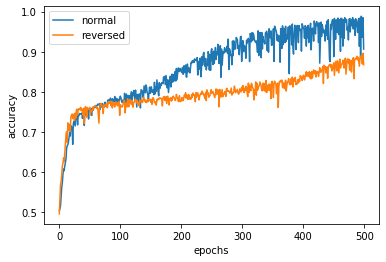

In [6]:
import matplotlib.pyplot as plt

normal_model_accuracy = normal_result.history['val_accuracy']
reversed_model_accuracy = reversed_result.history['val_accuracy']
x_len = min(len(normal_model_accuracy), len(reversed_model_accuracy))
epochs = range(x_len)

plt.plot(epochs, normal_model_accuracy, linestyle = '-',  label = 'normal')
plt.plot(epochs,reversed_model_accuracy, linestyle = '-',  label = 'reversed')
plt.legend(loc="upper left")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()